In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

plt.style.use('dark_background')

%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


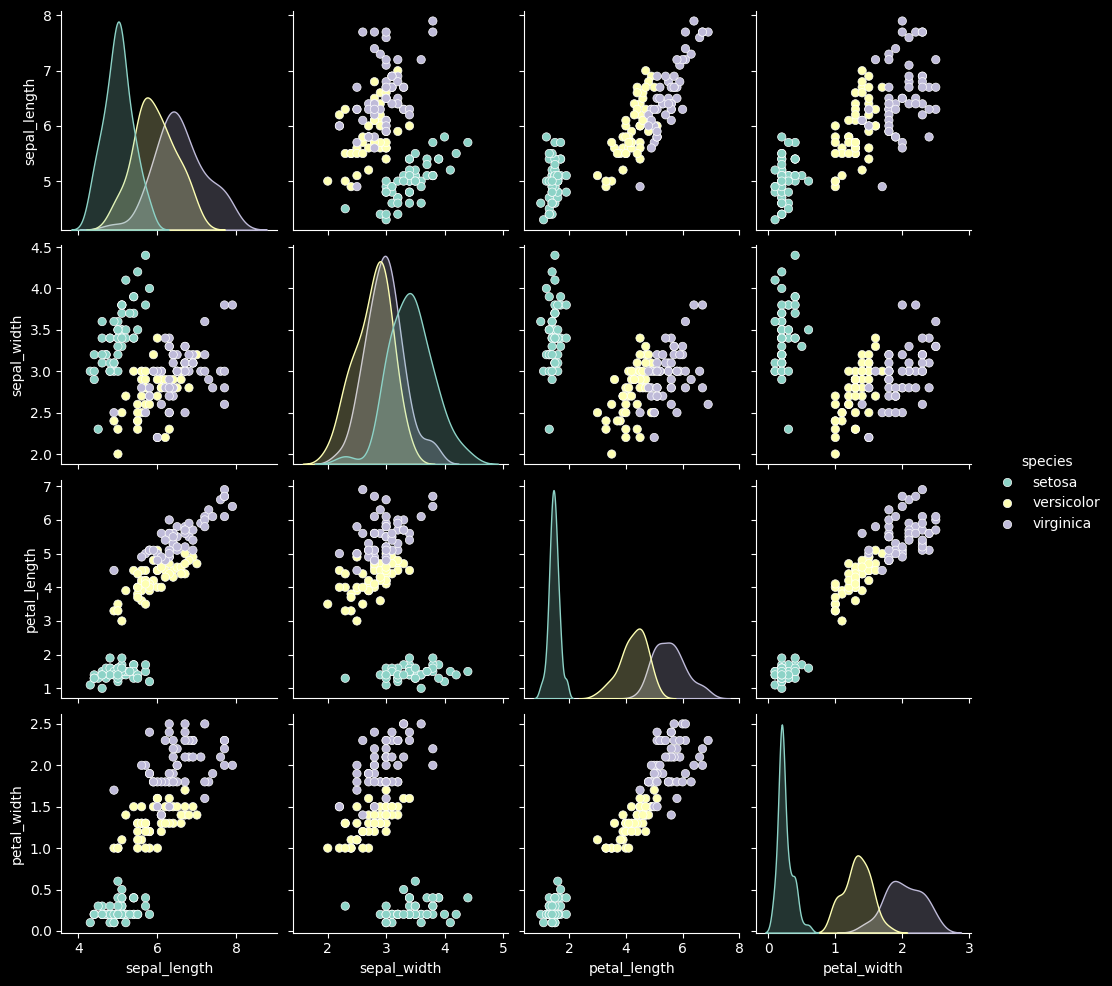

In [5]:
sns.pairplot(data=iris, hue='species')

In [7]:
X = iris.drop('species',axis=1)
Y = iris['species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [12]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

model = GridSearchCV(SVC(), param_grid)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(f"Classification Report:\n{classification_report(y_test, predictions)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions)}")

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.87      0.93      0.90        14
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


Confusion Matrix:
[[16  0  0]
 [ 0 13  1]
 [ 0  2 13]]
